- A DATA SCIENCE APPROACH TO PROFILING ONLINE DATERS ACCORDING TO AGE & GENERATION
  - 1 - Can your dating profile predict your age?
  - 2 - Can your dating profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers)
    Using a dataset of almost 60,000 anonymized entries from the dating platform OKCupid, You will explore the above questions using supervised machine learning techniques. You will  examine different aspects or features of user profiles and see which ones you will integrate into your models to achieve the most satisfactory scores. You will use regression techniques to tackle the first question and classification models to address the second.
    By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred to be dated around 2011 or 2012. At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years old. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('profiles.csv',low_memory=False)

In [3]:
#df.drop_duplicates(inplace=True)
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t 

In [4]:
df['job'].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [5]:
df['drinks'].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [6]:
df["drugs"].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [7]:
df["smokes"].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [8]:
df["drinks"] = df["drinks"].map({"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5})
df["drugs"] = df["drugs"].map({"never":0, "sometimes":1, "often":2})
df["smokes"] = df["smokes"].map({"no":0, "trying to quit":1, "sometimes":2, "when drinking":3, "yes":4})

In [9]:
df['diet'].replace({'strictly ':'','mostly ':''},regex=True,inplace=True)

In [10]:
df['diet'].unique()

array(['anything', 'other', 'vegetarian', nan, 'vegan', 'halal', 'kosher'],
      dtype=object)

In [11]:
df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [12]:
df['body_type']=df['body_type'].map({'fit':'sporty',
                                     'athletic':'sporty',
                                     'thin':'sporty',
                                     'skinny':'sporty',
                                    'average':'average',
                                    'curvy':'curvy', 
                                     'a little extra':'curvy',
                                     'full figured':'curvy',
                                    'overweight':'bad',
                                     'jacked':'bad',
                                     'used up':'bad',
                                     'rather not say':'bad'})

In [13]:
df['body_type'].unique()

array(['curvy', 'average', 'sporty', nan, 'bad'], dtype=object)

In [14]:
df['speaks']=df['speaks'].astype('category')
df['languages']=df['speaks'].apply(lambda x:len(list(x.split(','))))

In [15]:
df['last_online']=df['last_online'].str.split('-').str[0]

In [16]:
df['last_online']=df['last_online'].fillna(df['last_online'].median())

In [17]:
df['last_online']=df['last_online'].astype(int)

In [18]:
df['last_online'].unique()

array([2012, 2011])

In [19]:
df['education'].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school'], dtype=object)

- working on yazanlar genelde bir okulda okumakta olduğundan student olarak,graduated from geçen yerler mezun olmuş insanlar olduğundan graduated olarak ve okuldan yada eğitiminden ayrılan insanları da dropped olarak değiştirdim.

In [20]:
df['education'].replace({'working':'student','graduated from':'graduated','dropped out':'dropped'},inplace=True)

In [21]:
df['education']=df['education'].str.split().str[0]

In [22]:
df['education'].replace({'college/university':'graduated','two-year':'graduated','space':'graduated','masters':'graduated','high':'graduated','ph.d':'graduated','law':'graduated'},inplace=True)

In [23]:
df['education'].unique()

array(['working', 'graduated', nan, 'dropped'], dtype=object)

In [24]:
df=df.drop(columns=['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9',
                   'location','offspring','ethnicity','job','sign','speaks','pets','religion'],axis=1)
df

,age,body_type,diet,drinks,drugs,education,height,income,last_online,orientation,sex,smokes,status,languages
0,22.0,curvy,anything,2.0,0.0,working,75.0,-1.0,2012,straight,m,2.0,single,1.0
1,35.0,average,other,3.0,1.0,working,70.0,80000.0,2012,straight,m,0.0,single,3.0
2,38.0,sporty,anything,2.0,NaN,graduated,68.0,-1.0,2012,straight,m,0.0,available,3.0
3,23.0,sporty,vegetarian,2.0,NaN,working,71.0,20000.0,2012,straight,m,0.0,single,2.0
4,29.0,sporty,NaN,2.0,0.0,graduated,66.0,-1.0,2012,straight,m,0.0,single,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,31.0,sporty,anything,2.0,1.0,NaN,72.0,-1.0,2012,gay,m,2.0,single,1.0
9511,34.0,average,NaN,2.0,NaN,dropped,71.0,-1.0,2012,gay,m,3.0,single,1.0
9512,29.0,sporty,anything,1.0,0.0,graduated,70.0,-1.0,2012,gay,m,0.0,single,3.0
9513,49.0,bad,NaN,1.0,0.0,graduated,64.0,-1.0,2012,straight,f,0.0,single,1.0


In [25]:
miss=df.isnull().sum()
miss[miss>0]

age               1
body_type       849
diet           3754
drinks          503
drugs          2300
education      1056
height            1
income            1
orientation       1
sex               1
smokes          919
status            1
languages         7
dtype: int64

In [26]:
for col in ('age','height','languages'):
    df[col] = df[col].fillna(df[col].median())

In [27]:
for col in ('drinks','drugs','smokes','income'):
    df[col]=df[col].fillna(0)

- “Millennial” :1, “Gen X-er” :2, “Boomers” :3.

In [28]:
df['age']=df['age'].astype(int)

epoch = []
for i in range(len(df)):
    if 17 < int(df["age"].iloc[i]) < 33:
        epoch.append(1)
    elif 32 < int(df["age"].iloc[i]) < 48:
        epoch.append(2)
    else:
        epoch.append(3)
df["epoch"] = epoch

In [29]:
df['body_type']=df['body_type'].astype('category')
df['diet']=df['diet'].astype('category')
df['sex']=df['sex'].astype('category')
df['status']=df['status'].astype('category')
df['orientation']=df['orientation'].astype('category')

In [30]:
for col in ('body_type','diet','sex','status','education','orientation'):
    df[col]=df[col].fillna(df[col].mode()[0])

In [31]:
df.isnull().sum()

age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
height         0
income         0
last_online    0
orientation    0
sex            0
smokes         0
status         0
languages      0
epoch          0
dtype: int64

In [32]:
df

,age,body_type,diet,drinks,drugs,education,height,income,last_online,orientation,sex,smokes,status,languages,epoch
0,22,curvy,anything,2.0,0.0,working,75.0,-1.0,2012,straight,m,2.0,single,1.0,1
1,35,average,other,3.0,1.0,working,70.0,80000.0,2012,straight,m,0.0,single,3.0,2
2,38,sporty,anything,2.0,0.0,graduated,68.0,-1.0,2012,straight,m,0.0,available,3.0,2
3,23,sporty,vegetarian,2.0,0.0,working,71.0,20000.0,2012,straight,m,0.0,single,2.0,1
4,29,sporty,anything,2.0,0.0,graduated,66.0,-1.0,2012,straight,m,0.0,single,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,31,sporty,anything,2.0,1.0,graduated,72.0,-1.0,2012,gay,m,2.0,single,1.0,1
9511,34,average,anything,2.0,0.0,dropped,71.0,-1.0,2012,gay,m,3.0,single,1.0,2
9512,29,sporty,anything,1.0,0.0,graduated,70.0,-1.0,2012,gay,m,0.0,single,3.0,1
9513,49,bad,anything,1.0,0.0,graduated,64.0,-1.0,2012,straight,f,0.0,single,1.0,3


In [33]:
df.corr()

,age,drinks,drugs,height,income,last_online,smokes,languages,epoch
age,1.000000,-0.084395,-0.115609,-0.022076,0.011429,0.015785,-0.149518,-0.024329,0.904978
drinks,-0.084395,1.000000,0.191072,0.021241,0.051323,0.020065,0.152562,0.025524,-0.102536
drugs,-0.115609,0.191072,1.000000,0.042679,0.068744,-0.015415,0.293375,0.007752,-0.098056
height,-0.022076,0.021241,0.042679,1.000000,0.073107,0.016630,0.033920,0.015971,-0.034841
income,0.011429,0.051323,0.068744,0.073107,1.000000,-0.009382,0.034499,0.063327,0.007788
last_online,0.015785,0.020065,-0.015415,0.016630,-0.009382,1.000000,-0.032081,0.035814,0.015764
smokes,-0.149518,0.152562,0.293375,0.033920,0.034499,-0.032081,1.000000,-0.026997,-0.134449
languages,-0.024329,0.025524,0.007752,0.015971,0.063327,0.035814,-0.026997,1.000000,-0.018381
epoch,0.904978,-0.102536,-0.098056,-0.034841,0.007788,0.015764,-0.134449,-0.018381,1.000000


1 - Flört profiliniz yaşınızı tahmin edebilir mi? 

In [39]:
from pycaret.regression import *
exp_name=setup(data=df,target='age')

,Description,Value
0,session_id,7211
1,Target,age
2,Original Data,"(9515, 15)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6660, 31)"


In [40]:
best_model=compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.0501,13.7949,3.7134,0.8424,0.1135,0.0986,0.1620
lr,Linear Regression,3.0876,14.0346,3.7457,0.8397,0.1151,0.1001,0.7340
ridge,Ridge Regression,3.0873,14.0340,3.7456,0.8397,0.1151,0.1001,0.0090
lar,Least Angle Regression,3.0876,14.0357,3.7458,0.8397,0.1151,0.1001,0.0120
br,Bayesian Ridge,3.0874,14.0341,3.7456,0.8397,0.1151,0.1001,0.0110
lightgbm,Light Gradient Boosting Machine,3.0655,14.1491,3.7610,0.8383,0.1146,0.0989,0.1030
omp,Orthogonal Matching Pursuit,3.1044,14.1636,3.7629,0.8382,0.1161,0.1009,0.0100
catboost,CatBoost Regressor,3.0678,14.2854,3.7789,0.8367,0.1149,0.0989,5.5970
ada,AdaBoost Regressor,3.1619,14.4379,3.7992,0.8351,0.1168,0.1027,0.0580
xgboost,Extreme Gradient Boosting,3.1476,15.2323,3.9023,0.8260,0.1188,0.1016,0.5990


2 - Flört profiliniz, ait olduğunuz nesli tahmin edebilir mi? (Millennial, Gen X-er veya Boomers)

- Yaş sütunu %90 etkiliyor epoch sütununu.Eğer çıkarıp classification yaparsam %64 accuracy,%68 AUC başarı oranına sahip oluyorum.Yaş sütununu eklersem %100 başarı sağlıyorum.

In [41]:
df=df.drop('age',axis=1)

In [42]:
from pycaret.classification import *
exp_name=setup(data=df,target='epoch')

,Description,Value
0,session_id,7770
1,Target,epoch
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2"
4,Original Data,"(9515, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6438,0.6868,0.3674,0.5793,0.5548,0.1030,0.1479,0.8430
ada,Ada Boost Classifier,0.6420,0.6608,0.3675,0.5701,0.5557,0.1043,0.1453,0.1100
lr,Logistic Regression,0.6314,0.5252,0.3333,0.3986,0.4887,0.0000,0.0000,0.0370
nb,Naive Bayes,0.6314,0.5644,0.3333,0.3986,0.4887,0.0000,0.0000,0.0150
lightgbm,Light Gradient Boosting Machine,0.6314,0.6659,0.3775,0.5633,0.5650,0.1181,0.1416,0.3050
ridge,Ridge Classifier,0.6300,0.0000,0.3374,0.5048,0.5018,0.0148,0.0377,0.0100
catboost,CatBoost Classifier,0.6285,0.6587,0.3846,0.5661,0.5698,0.1272,0.1464,8.2380
lda,Linear Discriminant Analysis,0.6279,0.6665,0.3396,0.5128,0.5044,0.0193,0.0427,0.0200
xgboost,Extreme Gradient Boosting,0.6222,0.6584,0.3788,0.5585,0.5639,0.1135,0.1305,1.5280
knn,K Neighbors Classifier,0.5905,0.6017,0.3645,0.5338,0.5491,0.0834,0.0882,0.0560


In [44]:
lr=create_model('lr',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6306,0.5004,0.3333,0.3977,0.4878,0.0000,0.0000
1,0.6306,0.5131,0.3333,0.3977,0.4878,0.0000,0.0000
2,0.6306,0.5206,0.3333,0.3977,0.4878,0.0000,0.0000
3,0.6306,0.5476,0.3333,0.3977,0.4878,0.0000,0.0000
4,0.6321,0.5185,0.3333,0.3996,0.4897,0.0000,0.0000
5,0.6321,0.5154,0.3333,0.3996,0.4897,0.0000,0.0000
6,0.6321,0.5395,0.3333,0.3996,0.4897,0.0000,0.0000
7,0.6321,0.5547,0.3333,0.3996,0.4897,0.0000,0.0000
8,0.6321,0.5332,0.3333,0.3996,0.4897,0.0000,0.0000
9,0.6306,0.5087,0.3333,0.3977,0.4878,0.0000,0.0000


In [45]:
gbc=create_model('gbc',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6441,0.6805,0.3650,0.5594,0.5540,0.1053,0.1513
1,0.6396,0.6630,0.3635,0.5631,0.5512,0.0928,0.1344
2,0.6321,0.6992,0.3584,0.5684,0.5382,0.0715,0.1051
3,0.6426,0.7041,0.3651,0.5694,0.5528,0.0962,0.1424
4,0.6456,0.7186,0.3652,0.5657,0.5558,0.1058,0.1528
5,0.6321,0.6575,0.3524,0.5376,0.5365,0.0656,0.0985
6,0.6562,0.7084,0.3762,0.6679,0.5639,0.1218,0.1876
7,0.6532,0.6718,0.3886,0.6103,0.5790,0.1477,0.1896
8,0.6486,0.6766,0.3741,0.5901,0.5633,0.1187,0.1667
9,0.6441,0.6878,0.3652,0.5608,0.5537,0.1044,0.1511


In [46]:
xgb=create_model('xgboost',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6336,0.6651,0.3916,0.5879,0.5769,0.1394,0.1594
1,0.6141,0.6321,0.3873,0.5581,0.5616,0.1057,0.1188
2,0.6276,0.6802,0.3821,0.5653,0.5705,0.1291,0.1465
3,0.6201,0.6549,0.3760,0.5551,0.5569,0.0981,0.1167
4,0.6246,0.6872,0.3716,0.5553,0.5572,0.0971,0.1177
5,0.6186,0.6255,0.3650,0.5403,0.5545,0.0938,0.1095
6,0.6381,0.6931,0.3879,0.5769,0.5747,0.1367,0.1622
7,0.6096,0.6349,0.3757,0.5443,0.5615,0.1123,0.1222
8,0.6306,0.6553,0.3878,0.5715,0.5739,0.1313,0.1507
9,0.6051,0.6554,0.3632,0.5305,0.5514,0.0914,0.1009


In [47]:
blend_specific_soft=blend_models(estimator_list=(lr,gbc,xgb),method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6336,0.6779,0.3481,0.5326,0.5247,0.0524,0.0922
1,0.6336,0.6493,0.3538,0.5535,0.5351,0.0632,0.1013
2,0.6336,0.6921,0.3500,0.5291,0.5287,0.0579,0.0960
3,0.6411,0.6795,0.3593,0.6631,0.5336,0.0644,0.1236
4,0.6486,0.7053,0.3649,0.5779,0.5532,0.1002,0.1573
5,0.6321,0.6446,0.3467,0.5313,0.5237,0.0432,0.0767
6,0.6456,0.7064,0.3582,0.6411,0.5332,0.0715,0.1393
7,0.6381,0.6538,0.3600,0.5645,0.5416,0.0796,0.1206
8,0.6411,0.6656,0.3606,0.6017,0.5396,0.0731,0.1235
9,0.6306,0.6720,0.3467,0.5186,0.5235,0.0499,0.0836


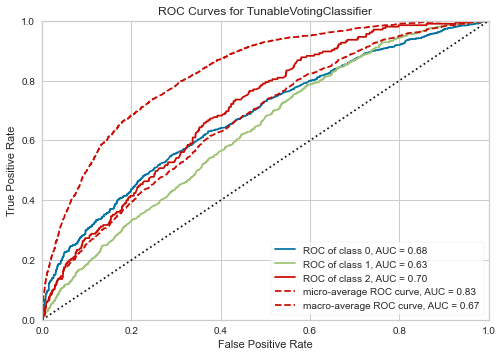

In [48]:
plot_model(blend_specific_soft)

In [39]:
y=df['epoch']
x=df.drop('epoch',axis=1)
x=pd.get_dummies(x,drop_first=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [40]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dropout(0.50),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(512, activation='softmax'),])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test,y_test))


Epoch 1/40
60/60 [==============================] - 1s 15ms/step - loss: 500.5411 - accuracy: 0.4547 - val_loss: 26.1002 - val_accuracy: 0.3421
Epoch 2/40
60/60 [==============================] - 1s 12ms/step - loss: 37.4168 - accuracy: 0.5522 - val_loss: 2.4324 - val_accuracy: 0.6337
Epoch 3/40
60/60 [==============================] - 1s 12ms/step - loss: 9.3505 - accuracy: 0.5842 - val_loss: 1.6025 - val_accuracy: 0.6337
Epoch 4/40
60/60 [==============================] - 1s 12ms/step - loss: 1.3490 - accuracy: 0.6204 - val_loss: 0.8557 - val_accuracy: 0.6337
Epoch 5/40
60/60 [==============================] - 1s 12ms/step - loss: 0.8519 - accuracy: 0.6379 - val_loss: 0.7754 - val_accuracy: 0.6337
Epoch 6/40
60/60 [==============================] - 1s 13ms/step - loss: 0.8053 - accuracy: 0.6344 - val_loss: 0.8449 - val_accuracy: 0.6337
Epoch 7/40
60/60 [==============================] - 1s 12ms/step - loss: 0.8608 - accuracy: 0.6286 - val_loss: 0.8014 - val_accuracy: 0.6337
Epoch 8/4

In [42]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

60/60 [==============================] - 0s 2ms/step - loss: 0.8401 - accuracy: 0.6337
Accuracy: 63.37
